# Arman Ghasemi   KU ID : 2970754               

## EECS 868  Project 1       

In [1]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Defining the problem varibles:

In [2]:
x1 = 1
x2 = 3
d1 = 1/math.sqrt(2)
d2 = -1/math.sqrt(2)
x=[x1,x2] # Starting point
d=[d1,d2] # Direction
c1 = 0.01
c2 = 0.1
alpha_max = 50 
tau1 = (math.sqrt(5) + 1) / 2  #Golden Section ratio

Defining the example function and the derivative:

In [3]:
# The Function f(x1,x2) after getting direction of d with alph (Phi(alpha))
def Phi(x,d,alpha):
    return math.exp((x[1]-x[0]+alpha*(d[1]-d[0]))/2)+(5/8)*((1.1*x[0]-x[1])+alpha*(1.1*d[0]-d[1]))
# Derivative of Phi(alpha)
def PhiPrime(x,d,alpha):
    return (math.exp((x[1]-x[0]+alpha*(d[1]-d[0]))/2)*(d[1]-d[0])/2+(5/8)*(1.1*d[0]-d[1]))
# The line
def l(alpha):
    return Phi(x,d,0)+c1*PhiPrime(x,d,0)*alpha


## 2. Strong Wolfe

Here the GSS_Strong function is provided to do the line search and check the Strong Wolfe condition.

In [4]:
def GSS_Strong(f,x,d,alpha):
    data=[] 
    low = 0          # a0 in uncertainty range
    high =alpha         # b0 in uncertainty range
    flag1 = False       #flag for 1st condition
    flag2 = False       #flag for 2nd condition
    
    #start the iteration 0 with alpha = 0
    i = 0               # iteration index
    alpha = 0
    ObjF = Phi(x,d,alpha)
    phiprime = PhiPrime(x,d,alpha)
    data =[i, alpha, ObjF, phiprime,flag1,flag2]
    
    #Check the alpha_max/2 
    i = i+1
    alpha = (low+high)/2
    ObjF = Phi(x,d,alpha)
    phiprime = PhiPrime(x,d,alpha)
    data1 = [i, alpha, ObjF, phiprime,flag1,flag2]
    data = data+data1 #store the data
    
    #start Golden search
    i = i+1
    cc = high - (high - low) / tau1 
    dd = low + (high - low) / tau1
    
    while flag1 == False or flag2 == False :
        if Phi(x,d,cc) < Phi(x,d,dd):
            high = dd
            alpha = (high+low)/2
            ObjF = Phi(x,d,alpha)
            phiprime = PhiPrime(x,d,alpha)
            if l(alpha)>= ObjF: # Check the 1st condition
                flag1 = True
            if abs(PhiPrime(x,d,alpha))<= c2*abs(PhiPrime(x,d,0)): # check the 2nd condition
                flag2 = True
            data2 = [i, alpha, ObjF, phiprime,flag1,flag2]                
        else:
            low = cc
            alpha = (high+low)/2
            ObjF = Phi(x,d,alpha)
            phiprime = PhiPrime(x,d,alpha)
            if l(alpha)>= ObjF: # Check the 1st condition
                flag1 = True
            if abs(PhiPrime(x,d,alpha))<= c2*abs(PhiPrime(x,d,0)): # check the 2nd condition
                flag2 = True
            data2 = [i, alpha, ObjF, phiprime,flag1,flag2]            
        # Update the values for next iteration
        cc = high - (high - low) / tau1
        dd = low + (high - low) / tau1
        data = data+data2       
        i = i+1
    return(data)


In [5]:
#call the function with starting point #x, direction #d, and #alpha_max
StrongWolfe = GSS_Strong(Phi,x,d,alpha_max) 

In [6]:
# preparing the data to put in datafram format
final = (np.reshape(StrongWolfe,(int(len(StrongWolfe)/6),6)))
df = pd.DataFrame(final,  columns =['Iteration', 'Alpha','Func','PhiPrime','Cond1','Cond2'])
df['Cond1'] = df['Cond1'].astype('bool')
df['Cond2'] = df['Cond2'].astype('bool')
print(df)

    Iteration      Alpha       Func  PhiPrime  Cond1  Cond2
0         0.0   0.000000   1.530782 -0.994038  False  False
1         1.0  25.000000  22.014441  0.928078  False  False
2         2.0  15.450850  13.152137  0.928043  False  False
3         3.0   9.549150   7.678029  0.925832  False  False
4         4.0   5.901699   4.331608  0.898469  False  False
5         5.0   3.647451   2.403770  0.782306  False  False
6         6.0   2.254249   1.456735  0.537672   True  False
7         7.0   1.393202   1.120468  0.210387   True  False
8         8.0   0.861046   1.090296 -0.117505   True  False
9         9.0   1.189937   1.088708  0.099451   True  False
10       10.0   0.986671   1.081199 -0.028632   True   True


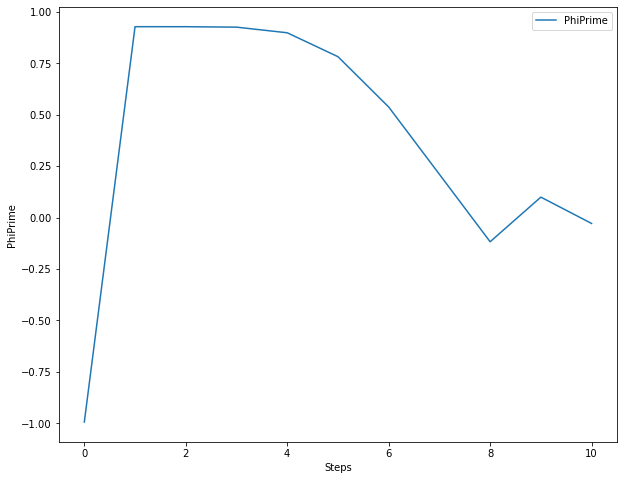

In [7]:
df.plot(x= "Iteration", y = "PhiPrime", figsize=(10,8))
plt.ylabel("PhiPrime")
plt.xlabel("Steps")
plt.show()

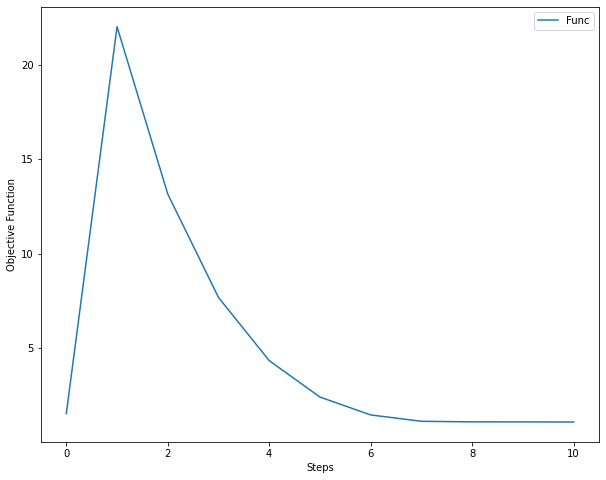

In [8]:
df.plot(x= "Iteration", y = "Func", figsize=(10,8))
plt.ylabel("Objective Function")
plt.xlabel("Steps")
plt.show()

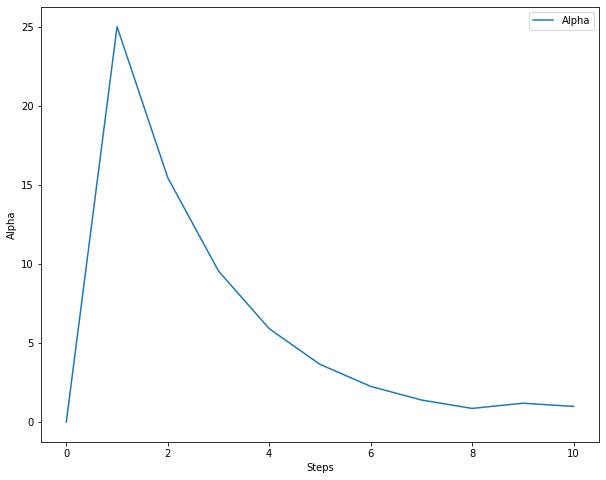

In [9]:
df.plot(x= "Iteration", y = "Alpha",figsize=(10,8))
plt.ylabel("Alpha")
plt.xlabel("Steps")
plt.show()

## Weak Wolfe

In [10]:
def GSS_Weak(f,x,d,alpha):
    data=[] 
    low = 0          # a0 in uncertainty range
    high =alpha         # b0 in uncertainty range
    flag1 = False       #flag for 1st condition
    flag2 = False       #flag for 2nd condition
    
    #start the iteration 0 with alpha = 0
    i = 0               # iteration index
    alpha = 0
    ObjF = Phi(x,d,alpha)
    phiprime = PhiPrime(x,d,alpha)
    data =[i, alpha, ObjF, phiprime,flag1,flag2]
    
    #Check the alpha_max/2 
    i = i+1
    alpha = (low+high)/2
    ObjF = Phi(x,d,alpha)
    phiprime = PhiPrime(x,d,alpha)
    if l(alpha)>= ObjF: # Check the 1st condition
        flag1 = True
    if PhiPrime(x,d,alpha)>= c2*PhiPrime(x,d,0): # check the 2nd condition
        flag2 = True
    data1 = [i, alpha, ObjF, phiprime,flag1,flag2]
    data = data+data1 #store the data
    #start Golden search
    i = i+1
    cc = high - (high - low) / tau1 
    dd = low + (high - low) / tau1
    
    while flag1 == False or flag2 == False :
        if Phi(x,d,cc) < Phi(x,d,dd):
            high = dd
            alpha = (high+low)/2
            ObjF = Phi(x,d,alpha)
            phiprime = PhiPrime(x,d,alpha)
            if l(alpha)>= ObjF: # Check the 1st condition
                flag1 = True
            if PhiPrime(x,d,alpha)>= c2*PhiPrime(x,d,0): # check the 2nd condition
                flag2 = True
            data2 = [i, alpha, ObjF, phiprime,flag1,flag2]                
        else:
            low = cc
            alpha = (high+low)/2
            ObjF = Phi(x,d,alpha)
            phiprime = PhiPrime(x,d,alpha)
            if l(alpha)>= ObjF: # Check the 1st condition
                flag1 = True
            if PhiPrime(x,d,alpha)>= c2*PhiPrime(x,d,0): # check the 2nd condition
                flag2 = True
            data2 = [i, alpha, ObjF, phiprime,flag1,flag2]            
        # Update the values for next iteration
        cc = high - (high - low) / tau1
        dd = low + (high - low) / tau1
        data = data+data2       
        i = i+1
    return(data)

In [11]:
#call the function with starting point #x, direction #d, and #alpha_max
WeakWolfe = GSS_Weak(Phi,x,d,alpha_max) 

In [12]:
# preparing the data to put in datafram format
final2 = (np.reshape(WeakWolfe,(int(len(WeakWolfe)/6),6)))
df2 = pd.DataFrame(final2,  columns =['Iteration', 'Alpha','Func','PhiPrime','Cond1','Cond2'])
df2['Cond1'] = df2['Cond1'].astype('bool')
df2['Cond2'] = df2['Cond2'].astype('bool')
print(df2)

   Iteration      Alpha       Func  PhiPrime  Cond1  Cond2
0        0.0   0.000000   1.530782 -0.994038  False  False
1        1.0  25.000000  22.014441  0.928078  False   True
2        2.0  15.450850  13.152137  0.928043  False   True
3        3.0   9.549150   7.678029  0.925832  False   True
4        4.0   5.901699   4.331608  0.898469  False   True
5        5.0   3.647451   2.403770  0.782306  False   True
6        6.0   2.254249   1.456735  0.537672   True   True


## 3b.

The assumption that we do the line search is our function should be unimodal, which means function has a single relative minimum. Increasing the value of alpha will broaden the range of uncertainty interval that might have results in having multiple relative minumum points in that big range. Also, for very small values of alpha_max the second condition might not be satisfied and the algorithm would not stop (for alpha_max <=0.88 in this case).

## 3c.

For the small values of c1, 1st condition (Armijo condition) is more likely to be satisfied, and for the bigger values of c1 the algorithm might not converge becuase the 1st condition will not be satisfied(c1 > 0.52 in this case). On the other hand, for large values of c2 the second condition is more likely to be satisfied and less iteration will run (when c1 is in the convergence range). For the very small values of c2 the algorithm tend to do more iteration to satisfy the sufficient progress condition.